# üìä An√°lise Explorat√≥ria dos Dados do SUS  
**Objetivo:** Higieniza√ß√£o e compreens√£o dos dados, com foco na vari√°vel-alvo `CIRCOBITO = 2`.

---

# üß™ Metodologia

1. **Conex√£o com a Base de Dados**
   - Utilizar a biblioteca `pysus` para acessar os dados p√∫blicos do SUS.

2. **An√°lise Explorat√≥ria dos Dados (EDA)**
   - Mapear as rela√ß√µes entre **todas as colunas** da base.
   - Identificar padr√µes, inconsist√™ncias e poss√≠veis outliers.

3. **Coeficientes de Correla√ß√£o**
   - Calcular o grau de rela√ß√£o de **todas as vari√°veis** com a vari√°vel-alvo `CIRCOBITO = 2`.
   - Gerar documento para facilitar a tomada de decis√£o na modelagem preditiva.

4. **Divulga√ß√£o**
   - Preparar visualiza√ß√µes e insights obtidos na an√°lise para **divulga√ß√£o no LinkedIn** do projeto.

---


## üì• Instala√ß√£o do ecossistema necess√°rio

## üìñ Importando bibliotecas necess√°rias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
from scipy.interpolate import make_interp_spline

## ‚õèÔ∏è **ETAPA 1:**  Minera√ß√£o dos dados

In [2]:
## ‚õèÔ∏èMinera√ß√£o dos dados

# URL do arquivo
url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv"

# Lendo o arquivo CSV diretamente da URL
dados = pd.read_csv(url, sep=';', encoding='latin-1')


C:\Users\pan_c\AppData\Local\Temp\ipykernel_38080\2594176260.py:7: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(url, sep=';', encoding='latin-1')


In [3]:
# Salvando o dataframe em formato CSV localmente
dados.to_csv(r"C:\Users\pan_c\Documents\C√≥digo K\Base de Dados SUS\Base de Dados SIM 2023.csv", index=False, sep=';', encoding='latin-1')

In [6]:
dados

contador  ORIGEM  TIPOBITO   DTOBITO  HORAOBITO  NATURAL  CODMUNNATU  \
0               1       1         2  14022023      930.0    833.0    330270.0   
1               2       1         2  14022023     1730.0    822.0    221110.0   
2               3       1         2  14022023      500.0    822.0    220790.0   
3               4       1         2  14022023     2235.0    823.0    231180.0   
4               5       1         2  14022023      940.0    841.0    411350.0   
...           ...     ...       ...       ...        ...      ...         ...   
1465605   1465606       1         2  30112023     2100.0    816.0    160050.0   
1465606   1465607       1         2  12122023     1220.0    815.0    150060.0   
1465607   1465608       1         2  22122023     1734.0    815.0    150060.0   
1465608   1465609       1         2  22122023     2030.0    813.0    130140.0   
1465609   1465610       1         2  31122023        NaN    851.0    510385.0   

             DTNASC  IDADE  SEXO  ...  TPRESGINFO  TPNIVELINV    DTCADINF  \
0        10071954.0    468     1  ...         NaN         NaN         NaN   
1        12091956.0    466     1  ...         NaN         NaN         NaN   
2        10011953.0    470     2  ...         NaN         NaN         NaN   
3        15121943.0    479     2  ...         NaN         NaN         NaN   
4         9041973.0    449     2  ...         NaN           M         NaN   
...             ...    ...   ...  ...         ...         ...         ...   
1465605   1042023.0    307     1  ...         NaN         NaN  10062024.0   
1465606  23101987.0    436     1  ...         NaN         NaN         NaN   
1465607   5112023.0    301     1  ...         NaN         NaN  15042024.0   
1465608   1012008.0    415     2  ...         NaN           E         NaN   
1465609  17122023.0    214     2  ...         NaN         NaN  26042024.0   

         MORTEPARTO   DTCONCASO  ALTCAUSA  CAUSABAS_O  TPPOS  TP_ALTERA  \
0               NaN         NaN       NaN         I10    NaN        NaN   
1               NaN         NaN       NaN        I678    NaN        NaN   
2               NaN         NaN       NaN        K750    NaN        NaN   
3               NaN         NaN       NaN         I64      S        NaN   
4               NaN         NaN       NaN        C189      S        NaN   
...             ...         ...       ...         ...    ...        ...   
1465605         3.0  26052024.0       2.0         NaN    NaN        NaN   
1465606         NaN         NaN       NaN         NaN    NaN        NaN   
1465607         3.0  20032024.0       1.0         NaN    NaN        NaN   
1465608         NaN         NaN       NaN         NaN    NaN        NaN   
1465609         3.0   4022024.0       2.0         NaN    NaN        NaN   

         CB_ALT  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
1465605     NaN  
1465606     NaN  
1465607     NaN  
1465608     NaN  
1465609     NaN  

[1465610 rows x 86 columns]

In [16]:
df = dados.copy()

In [17]:
df.columns

Index(['contador', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA',
       'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM',
       'ATESTADO', 'DTRECORIGA', 'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1',
       'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA', 'NUDIASOBCO',
       'DTCADINV', 'TPOBITOCOR', 'DTCONINV',

* ‚úÖ Dados minerados com sucesso

## üîç **ETAPA 2:** An√°lise explorat√≥ria dos dados
- Uma vez que sabemos que o target est√° na coluna `CIRCOBITO`, vamos analisar, uma a uma, as demais colunas para identificar quais s√£o preditores do tipo de √≥bito. Ao mesmo tempo, iremos gerar gr√°ficos anal√≠ticos para apresentar as informa√ß√µes posteriormente.

In [18]:
df.columns

Index(['contador', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA',
       'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM',
       'ATESTADO', 'DTRECORIGA', 'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1',
       'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA', 'NUDIASOBCO',
       'DTCADINV', 'TPOBITOCOR', 'DTCONINV',

In [19]:
df.drop(columns=['ORIGEM'], inplace=True)

In [20]:
df.drop(columns=['TIPOBITO'], inplace=True)

In [33]:
df['HORAOBITO']

0           930.0
1          1730.0
2           500.0
3          2235.0
4           940.0
            ...  
1416387    1200.0
1416388    2100.0
1416389    1220.0
1416390    1734.0
1416391    2030.0
Name: HORAOBITO, Length: 1416392, dtype: float64

In [31]:
# Remover linhas onde 'HORAOBITO' √© NaN ou string em branco:

# 1. Remover NaN:
df = df.dropna(subset=['HORAOBITO'])

# 2. Remover strings vazias ou s√≥ com espa√ßos (caso existam):
#    Converte em string, retira espa√ßos e filtra diferente de ''
df = df[df['HORAOBITO'].astype(str).str.strip() != '']

# Opcional: resetar o √≠ndice ap√≥s remo√ß√£o
df = df.reset_index(drop=True)


In [34]:
# 1. Converter para inteiro (remover o .0)
dados['HORAOBITO'] = dados['HORAOBITO'].fillna(0).astype(int)

# 2. Converter para string e preencher com zeros √† esquerda (4 d√≠gitos)
dados['HORAOBITO'] = dados['HORAOBITO'].astype(str).str.zfill(4)

# 3. Exemplo de visualiza√ß√£o
print(dados['HORAOBITO'].head(10))

HORAOBITO
0      0930
1      1730
2      0500
3      2235
4      0940
5      0906
6      0122
7      0242
8      2041
9      2024

In [36]:
df['HORAOBITO_FORMATADA'] = (
    dados['HORAOBITO']
    .astype(str)
    .str.zfill(4)
    .str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)
)

In [12]:
df = df[df['CIRCOBITO'] == '2'].copy()

In [13]:
df.head(3)


HORAOBITO NATURAL CODMUNNATU    DTNASC IDADE  SEXO RACACOR ESTCIV ESC  \
22      1100      813    130260   25101981   441     1       4      9   2   
37      1920      812    120020   27082003   419     1       4      1   3   
135     1200      812    120040   25101980   442     1       4      1   3   

    ESC2010  ... FONTES TPRESGINFO  TPNIVELINV NUDIASINF DTCADINF MORTEPARTO  \
22        1  ...                                                               
37        1  ...                                                               
135       2  ...                                                               

    DTCONCASO FONTESINF ALTCAUSA  CONTADOR  
22                                7886      
37                                13647     
135                               53256     

[3 rows x 84 columns]

In [14]:
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)
df['HORA'] = df['HORAOBITO'].str[:2].astype(int)

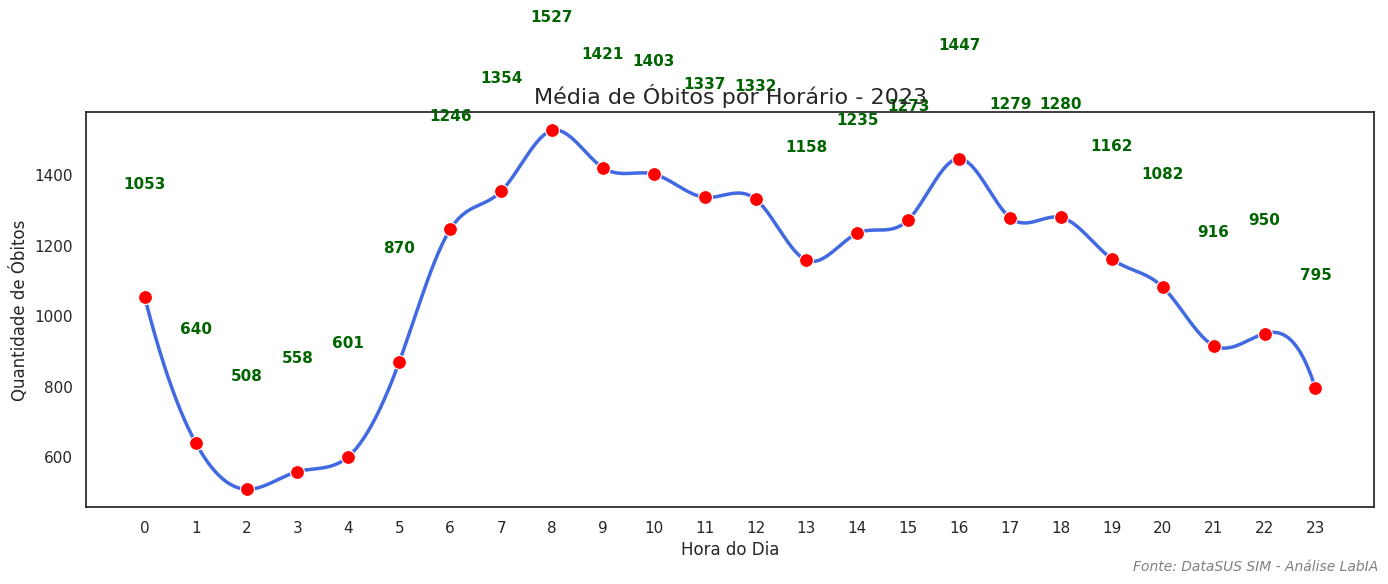

In [15]:
# 1. Garante 4 d√≠gitos
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)

# 2. Extrai hora
df['HORA'] = df['HORAOBITO'].str[:2].astype(int)

# 3. Agrupa por hora
contagem_por_hora = df.groupby('HORA').size().reset_index(name='QTD_OBITOS')

# Verifica se tem dados suficientes
if len(contagem_por_hora) < 4:
    raise ValueError("Poucos dados por hora para suaviza√ß√£o. M√≠nimo necess√°rio: 4 horas distintas.")

# 4. C√≥pia para as m√©dias individuais
media_por_hora = df.groupby('HORA').size().reset_index(name='MEDIA_OBITOS')

# 5. Merge
dados = pd.merge(contagem_por_hora, media_por_hora, on='HORA')

# 6. Estilo
sns.set_theme(style='white')

plt.figure(figsize=(14, 6))

# 7. Suaviza√ß√£o com seguran√ßa
x = dados['HORA'].to_numpy()
y = dados['QTD_OBITOS'].to_numpy()

try:
    xnew = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(xnew)
    plt.plot(xnew, y_smooth, color='royalblue', linewidth=2.5)
except ValueError:
    # fallback sem suavizar
    plt.plot(x, y, color='royalblue', linewidth=2.5)

# 8. Pontos
sns.scatterplot(data=dados, x='HORA', y='QTD_OBITOS', color='red', s=100, zorder=10)

# 9. R√≥tulo sem decimal
for i, row in dados.iterrows():
    plt.text(row['HORA'], row['QTD_OBITOS'] + 300,
             f"{int(row['MEDIA_OBITOS'])}", ha='center', va='bottom',
             fontsize=11, color='darkgreen', fontweight='bold')

# 10. Eixos e t√≠tulo
plt.title('M√©dia de √ìbitos por Hor√°rio - 2023', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de √ìbitos', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(False)

# 11. Fonte
plt.figtext(0.99, 0.01, 'Fonte: DataSUS SIM - An√°lise LabIA',
            horizontalalignment='right', fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.show()

In [16]:
df['HORAOBITO']


22         1100 
37         1920 
135        1200 
164        0830 
187        0100 
           ...  
2819730    0140 
2819734    0900 
2819761    2100 
2819781    1410 
2819795    0030 
Name: HORAOBITO, Length: 26427, dtype: object

In [17]:
# Prepara coluna HORAOBITO como string com 4 d√≠gitos
df['HORAOBITO'] = df['HORAOBITO'].astype(str).str.zfill(4)

# Filtra apenas valores v√°lidos (4 d√≠gitos num√©ricos)
df_validos = df[df['HORAOBITO'].str.fullmatch(r'\d{4}') == True].copy()

# Extrai HORA
df_validos['HORA'] = df_validos['HORAOBITO'].str[:2].astype(int)

# 1. Contagem de registros por hora
print("üìä Contagem de √≥bitos por hora:")
print(df_validos['HORA'].value_counts().sort_index())

# 2. Valores √∫nicos de HORAOBITO que geraram HORA == 0
print("\nüîç Valores brutos de HORAOBITO que viraram HORA == 0:")
print(df_validos[df_validos['HORA'] == 0]['HORAOBITO'].value_counts().head(20))

# 3. Valores inv√°lidos descartados no processo
df_invalidos = df[~df['HORAOBITO'].str.fullmatch(r'\d{4}')]
print("\n‚ö†Ô∏è Valores de HORAOBITO inv√°lidos que foram descartados:")
print(df_invalidos['HORAOBITO'].value_counts().head(10))

üìä Contagem de √≥bitos por hora:
Series([], Name: count, dtype: int64)

üîç Valores brutos de HORAOBITO que viraram HORA == 0:
Series([], Name: count, dtype: int64)

‚ö†Ô∏è Valores de HORAOBITO inv√°lidos que foram descartados:
HORAOBITO
0800     646
1000     573
0600     533
1200     520
1600     519
0900     514
0700     477
1100     471
1400     453
1700     453
Name: count, dtype: int64


# Parece que o 0000 √© um outlier, um valor proforma "placeholder" que √© utilizado apenas para n√£o deixar o dado em branco, perdendo assim a confiabilidade, devido a isto vamos retirar a 0 hora do nosso gr√°fico

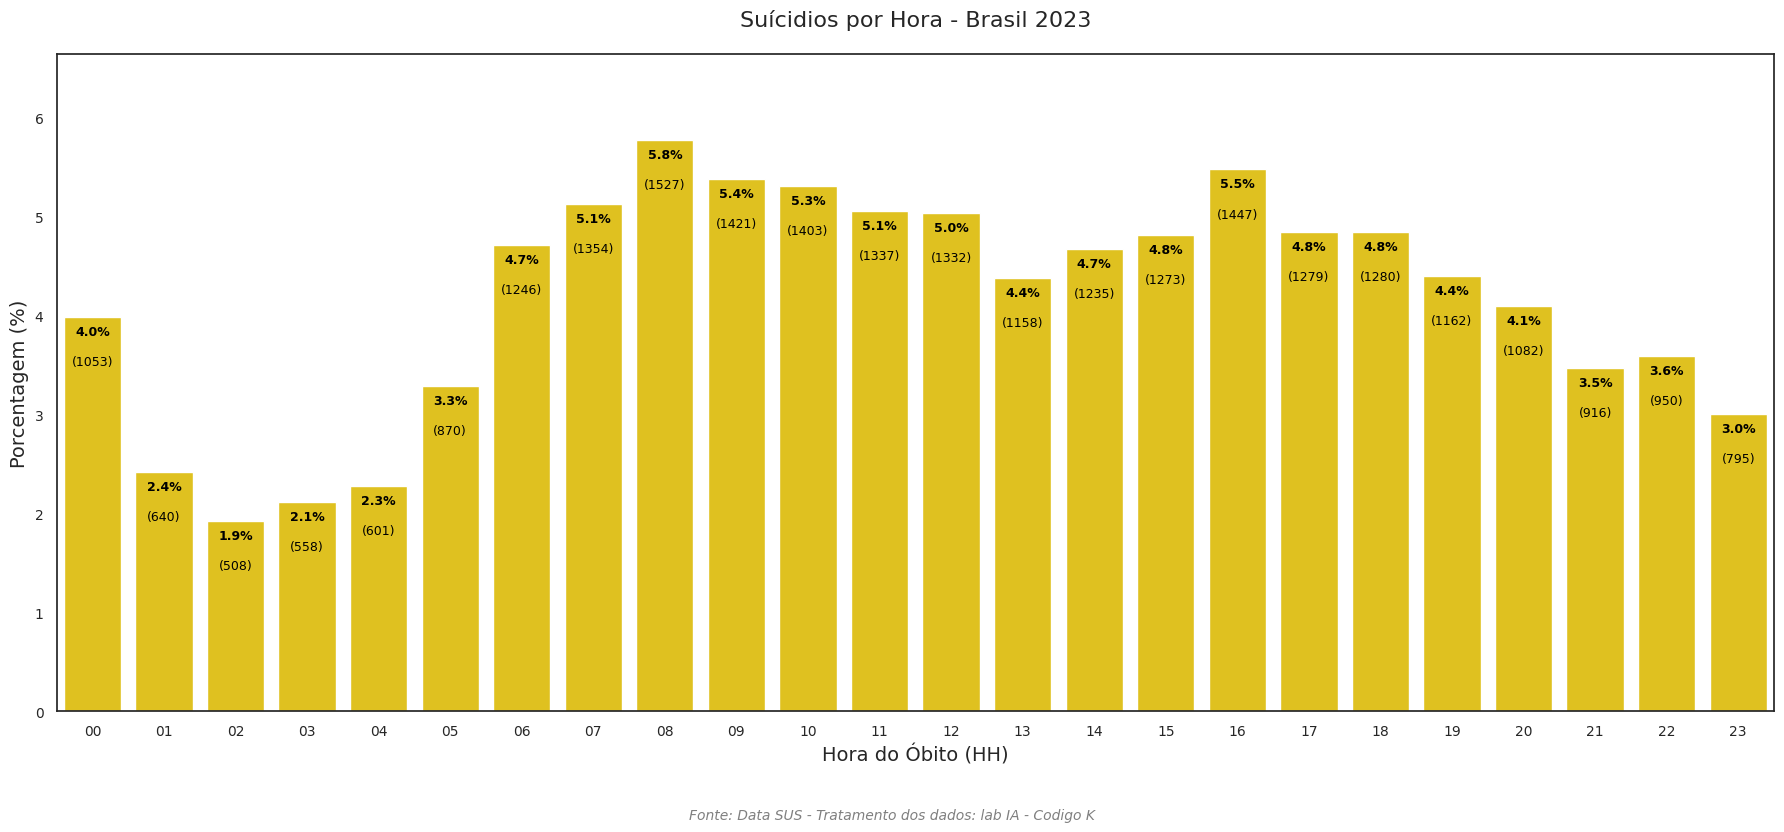

In [33]:
# Filtra removendo '0000' e cria uma c√≥pia expl√≠cita
df_filtered = df[df['HORAOBITO'] != 0].copy()

# --- Corre√ß√£o para o primeiro FutureWarning ---
# Atribuir diretamente os valores j√° convertidos para string
# N√£o precisamos da etapa intermedi√°ria de atribuir ''
df_filtered['HORA'] = df_filtered['HORAOBITO'].astype(str).str.zfill(4).str[:2]

# Certificar que todas as horas de 00 a 23 est√£o presentes no combined_data
# Isso √© √∫til para garantir que o gr√°fico sempre tenha 24 barras, mesmo que uma hora n√£o tenha dados
all_hours = [str(i).zfill(2) for i in range(24)]
full_range_df = pd.DataFrame({'HORA': all_hours})

# Conta e calcula porcentagem
counts = df_filtered['HORA'].value_counts().sort_index()
percentages = (counts / counts.sum()) * 100

# Criar um DataFrame combinado
combined_data = pd.DataFrame({
    'PORCENTAGEM': percentages,
    'CONTADOR': counts
}).reset_index()
combined_data.columns = ['HORA', 'PORCENTAGEM', 'CONTADOR']

# Unir com todas as horas para garantir que todas apare√ßam, mesmo que com 0 valores
combined_data = pd.merge(full_range_df, combined_data, on='HORA', how='left').fillna(0)
# Garantir que a coluna HORA est√° ordenada corretamente (como strings '00', '01', etc.)
combined_data['HORA'] = pd.Categorical(combined_data['HORA'], categories=all_hours, ordered=True)
combined_data = combined_data.sort_values('HORA')


plt.figure(figsize=(18, 9))

yellow_color = '#FFD700'

# --- Corre√ß√£o para o segundo UserWarning: Usar 'color' em vez de 'palette' e 'hue' ---
# Removendo palette e hue. A cor √© definida diretamente no argumento 'color'.
ax = sns.barplot(x='HORA', y='PORCENTAGEM', data=combined_data, color=yellow_color)

ax.set_title('Su√≠cidios por Hora - Brasil 2023', fontsize=16, pad=20)
ax.set_xlabel('Hora do √ìbito (HH)', fontsize=14)
ax.set_ylabel('Porcentagem (%)', fontsize=14)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

for index, p in enumerate(ax.patches):
    height = p.get_height()
    # Acessa o valor do contador correspondente √† barra atual
    # Usamos o `combined_data.iloc[index]` para garantir que pegamos o valor correto
    # correspondente √† ordem das barras no gr√°fico, que j√° est√° ordenada por 'HORA'
    count_value = combined_data.iloc[index]['CONTADOR']

    y_position_percent = height - (ax.get_ylim()[1] * 0.03)
    y_position_count = height - (ax.get_ylim()[1] * 0.08)

    # Apenas para garantir que o texto n√£o apare√ßa se a altura for 0 (0%)
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2.,
                y_position_percent,
                f'{height:.1f}%',
                ha='center', fontsize=9, color='black', fontweight='bold')

        ax.text(p.get_x() + p.get_width()/2.,
                y_position_count,
                f'({int(count_value)})',
                ha='center', fontsize=9, color='black')

# Definindo o limite superior do eixo Y com base nos dados reais
max_percentage = combined_data['PORCENTAGEM'].max()
# Ajustar o limite para dar espa√ßo suficiente para o texto, mesmo que a barra seja baixa
# Se n√£o houver dados, max_percentage pode ser 0. Evitar multiplicar por 0.
if max_percentage > 0:
    ax.set_ylim(0, max_percentage * 1.15) # Aumentei um pouco para 1.15
else:
    ax.set_ylim(0, 1) # Define um limite m√≠nimo se n√£o houver dados

# Ajustar o rect para dar mais espa√ßo para a fonte e o t√≠tulo
plt.tight_layout(rect=[0, 0.07, 1, 0.95])

# Coloca a fonte "Data SUS" abaixo do gr√°fico
plt.figtext(0.5, 0.03, 'Fonte: Data SUS - Tratamento dos dados: lab IA - Codigo K', ha='center', fontsize=10, style='italic', color='gray')

plt.show()

## üìå Conclus√£o

A an√°lise explorat√≥ria da vari√°vel **hora do √≥bito** revelou padr√µes temporais significativos nos registros de suic√≠dio no Brasil em 2023. Identificaram-se dois picos principais de incid√™ncia:

- Um **pico matutino √†s 08h**, representando **5,8%** dos casos.
- Um **pico vespertino √†s 16h**, com **5,5%** dos registros.

Em contrapartida, as **madrugadas entre 01h e 04h** apresentaram os menores √≠ndices de ocorr√™ncia, sugerindo um comportamento de menor risco neste intervalo.

Esses achados indicam que a vari√°vel **hora do √≥bito** pode conter sinal estat√≠stico relevante e potencial **valor preditivo**, justificando sua inclus√£o como feature em modelos de aprendizado supervisionado ‚Äî como **regress√£o log√≠stica**, **random forest** ou **gradient boosting** ‚Äî no contexto de predi√ß√£o de risco de suic√≠dio.

Al√©m disso, a distribui√ß√£o hor√°ria refor√ßa a hip√≥tese de que fatores cronobiol√≥gicos e sociais (como in√≠cio da jornada de trabalho ou hor√°rios de maior press√£o) podem influenciar significativamente o comportamento suicida, demandando investiga√ß√£o interdisciplinar mais profunda.

Essa etapa faz parte do escopo maior do **Projeto Turing**, que visa a constru√ß√£o de um sistema inteligente de apoio √† tomada de decis√£o para profissionais da sa√∫de e atendimento emergencial, com foco em **interven√ß√£o precoce baseada em dados abertos e ci√™ncia √©tica.**

> Pr√≥ximos passos incluem:
> - C√°lculo de coeficientes de correla√ß√£o entre hora e outras vari√°veis de perfil.
> - Treinamento de modelos preditivos com m√∫ltiplas features sociodemogr√°ficas.
> - Valida√ß√£o de performance com m√©tricas como AUC, F1-score e matriz de confus√£o.
> - Prototipagem de um sistema de alertas em tempo real.

---

üìé **Nota**: Esta pesquisa √© de natureza acad√™mica e n√£o substitui avalia√ß√£o m√©dica ou psicol√≥gica. Em caso de sofrimento emocional, procure ajuda especializada. No Brasil, contate o CVV pelo telefone 188 ou pelo site: [https://www.cvv.org.br](https://www.cvv.org.br)
